# **Classification and Hypothesis Testing: Life Expectancy Prediction**

---------------

## **Problem Statement**

### **Objective**

To build a model to predict the life expectancy of new countries.


### **Data Description**
Country life expectancy

- Status: Status of the country's development	
- Population: Population of country	
- Hepatitis B: Percentage of people finally one year old who were immunized against hepatitis B	
- Measles: The number of reported measles cases per 1000 people	
- Polio: Percentage of 1-year-olds immunized against polio	
- Diphtheria: Percentage of people finally one year old who were immunized against diphtheria	
- HIV/AIDS: The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people	
- Infant deaths: The number of infant deaths per 1000 people	
- Under-five deaths: the number of deaths of people under 5 years old per 1000 people	
- Total expenditure: The ratio of government medical-health expenses to total government expenses in percentage	
- GDP: Gross domestic product	
- BMI: The average body mass index of the entire population of the country	
- Thinness 1-19 years: Prevalence of thinness among people 19 years old in percentage	
- Alcohol: Liters of alcohol consumption among people over 15 years old	
- Schooling: The number of years that people study	

## **Importing the libraries required**

In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import math

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [2]:
# Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_csv("life_expectancy.csv")

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [3]:
data.head()

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  
0  584.259210  19.1                  17.2     0.01       10.1             65.0  
1  612.696514  18.6                  17.5     0.01       10.0             59.9  
2  631.744976  18.1                  17.7     0.01        9.9             59.9  
3  669.959000  17.6                  17.9     0.01        9.8             59.5  
4   63.537231  17.2                  18.2     0.01        9.5             59.2

In [4]:
data.tail()

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
2843  Zimbabwe  2004  Developing  12777511.0         68.0       31   67.0   
2844  Zimbabwe  2003  Developing  12633897.0          7.0      998    7.0   
2845  Zimbabwe  2002  Developing    125525.0         73.0      304   73.0   
2846  Zimbabwe  2001  Developing  12366165.0         76.0      529   76.0   
2847  Zimbabwe  2000  Developing  12222251.0         79.0     1483   78.0   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
2843        65.0      33.6             27                 42   
2844        68.0      36.7             26                 41   
2845        71.0      39.8             25                 40   
2846        75.0      42.1             25                 39   
2847        78.0      43.5             24                 39   

      Total expenditure         GDP   BMI  thinness  1-19 years  Alcohol  \
2843               7.13  454.366654  27.1                   9.4     4.36   
2844               6.52  453.351155  26.7                   9.8     4.06   
2845               6.53   57.348340  26.3                   1.2     4.43   
2846               6.16  548.587312  25.9                   1.6     1.72   
2847               7.10  547.358878  25.5                  11.0     1.68   

      Schooling  Life expectancy  
2843        9.2             44.3  
2844        9.5             44.5  
2845       10.0             44.8  
2846        9.8             45.3  
2847        9.8             46.0

### **Understand the shape of the dataset**

In [5]:
data.shape

(2848, 18)

* The dataset has 28488 rows and 20 columns. 

### **Check the data types of the columns for the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

- We can see that 10 columns have less than 2,848 non-null values i.e. columns have missing values.

### **Check the percentage of missing values in each column**

In [7]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

% of Missing Values
Country                              0.00
Year                                 0.00
Status                               0.00
Population                          22.61
Hepatitis B                         19.03
Measles                              0.00
Polio                                0.67
Diphtheria                           0.67
HIV/AIDS                             0.00
infant deaths                        0.00
under-five deaths                    0.00
Total expenditure                    7.76
GDP                                 15.52
BMI                                  1.12
thinness  1-19 years                 1.12
Alcohol                              6.60
Schooling                            5.62
Life expectancy                      0.00

- The `Population` column has 22.61% missing values out of the total observations.
- `Hepatitis B` column has 19.03% missing values out of the total observations.
- `GDP` column has 15.52% missing values out of the total observations.
- The `Alcohol` column has 6.60% missing values out of the total observations.
- `Schooling` column has 5.62% missing values out of the total observations.
- The columns 'Country, Year, Status, Measles, HIV/AIDS, Infant deaths, Under-five deaths' and 'Life expectancy' have no missing values.

### **Check the number of unique values in each column**

In [8]:
data.nunique()

Country                  178
Year                      16
Status                     2
Population              2198
Hepatitis B               87
Measles                  917
Polio                     73
Diphtheria                80
HIV/AIDS                 200
infant deaths            183
under-five deaths        227
Total expenditure        814
GDP                     2406
BMI                      602
thinness  1-19 years     200
Alcohol                 1058
Schooling                173
Life expectancy          362
dtype: int64

- Most of the variables are continuous except - Country, Year, and Status.

### Check the summary statistics of the dataset



In [8]:
data.describe().T

count          mean           std         min  \
Year                  2848.0  2.007500e+03  4.610582e+00  2000.00000   
Population            2204.0  1.283457e+07  6.196094e+07    34.00000   
Hepatitis B           2306.0  8.107676e+01  2.501907e+01     1.00000   
Measles               2848.0  2.083082e+03  1.024911e+04     0.00000   
Polio                 2829.0  8.268222e+01  2.343495e+01     3.00000   
Diphtheria            2829.0  8.245140e+01  2.369394e+01     2.00000   
HIV/AIDS              2848.0  1.756461e+00  5.148935e+00     0.10000   
infant deaths         2848.0  2.835990e+01  1.171880e+02     0.00000   
under-five deaths     2848.0  3.950000e+01  1.598009e+02     0.00000   
Total expenditure     2627.0  5.935577e+00  2.504439e+00     0.37000   
GDP                   2406.0  7.664399e+03  1.446624e+04     1.68135   
BMI                   2816.0  3.850337e+01  1.995549e+01     1.00000   
thinness  1-19 years  2816.0  4.847230e+00  4.443695e+00     0.10000   
Alcohol               2660.0  4.638932e+00  4.064721e+00     0.01000   
Schooling             2688.0  1.206016e+01  3.320160e+00     0.00000   
Life expectancy       2848.0  6.934740e+01  9.528332e+00    36.30000   

                                25%           50%           75%           max  
Year                    2003.750000  2.007500e+03  2.011250e+03  2.015000e+03  
Population            196758.500000  1.391756e+06  7.438947e+06  1.293859e+09  
Hepatitis B               77.000000  9.200000e+01  9.700000e+01  9.900000e+01  
Measles                    0.000000  1.600000e+01  3.367500e+02  2.121830e+05  
Polio                     78.000000  9.300000e+01  9.700000e+01  9.900000e+01  
Diphtheria                78.000000  9.300000e+01  9.700000e+01  9.900000e+01  
HIV/AIDS                   0.100000  1.000000e-01  7.000000e-01  5.060000e+01  
infant deaths              0.000000  3.000000e+00  2.000000e+01  1.800000e+03  
under-five deaths          0.000000  4.000000e+00  2.500000e+01  2.500000e+03  
Total expenditure          4.240000  5.760000e+00  7.530000e+00  1.760000e+01  
GDP                      477.541713  1.841087e+03  6.265659e+03  1.191727e+05  
BMI                       19.500000  4.390000e+01  5.620000e+01  7.760000e+01  
thinness  1-19 years       1.600000  3.300000e+00  7.125000e+00  2.770000e+01  
Alcohol                    0.930000  3.785000e+00  7.810000e+00  1.787000e+01  
Schooling                 10.200000  1.240000e+01  1.430000e+01  2.070000e+01  
Life expectancy           63.500000  7.220000e+01  7.580000e+01  8.900000e+01

* The data ranges from Year 2000 to Year 2015.
* Population ranges from 34 to over a billion. The mean is 10 million.
* The Measles column is left skewed.
* The schooling column has the mean of 12 years while the minimum is 0 and the maximum 20.
* The mean life expectancy is 69 years while the minimum is 36 and the maximum 89.

### **Check the count of each unique category in each of the categorical variables.** 

In [9]:
# Making a list of all catrgorical variables 
cat_col=['Country', 'Year','Status']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Afghanistan              16
Sao Tome and Principe    16
Niger                    16
Nigeria                  16
Norway                   16
                         ..
Greece                   16
Grenada                  16
Guatemala                16
Guinea                   16
Zimbabwe                 16
Name: Country, Length: 178, dtype: int64
--------------------------------------------------
2015    178
2014    178
2013    178
2012    178
2011    178
2010    178
2009    178
2008    178
2007    178
2006    178
2005    178
2004    178
2003    178
2002    178
2001    178
2000    178
Name: Year, dtype: int64
--------------------------------------------------
Developing    2352
Developed      496
Name: Status, dtype: int64
--------------------------------------------------


- From each country, there are 16 samples.
- There are 178 samples per year.
- The samples are collected from 2,352 developing countries and 496 developed countries.

In [10]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Country               2848 non-null   category
 1   Year                  2848 non-null   category
 2   Status                2848 non-null   category
 3   Population            2204 non-null   float64 
 4   Hepatitis B           2306 non-null   float64 
 5   Measles               2848 non-null   int64   
 6   Polio                 2829 non-null   float64 
 7   Diphtheria            2829 non-null   float64 
 8   HIV/AIDS              2848 non-null   float64 
 9   infant deaths         2848 non-null   int64   
 10  under-five deaths     2848 non-null   int64   
 11  Total expenditure     2627 non-null   float64 
 12  GDP                   2406 non-null   float64 
 13  BMI                   2816 non-null   float64 
 14  thinness  1-19 years  2816 non-null   float64 
 15  Alco

In [12]:
df = data.copy()

## **Exploratory Data Analysis**

### **Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [13]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

**Lets plot the histogram and box plot for the variable `Population` using the hist_box function**


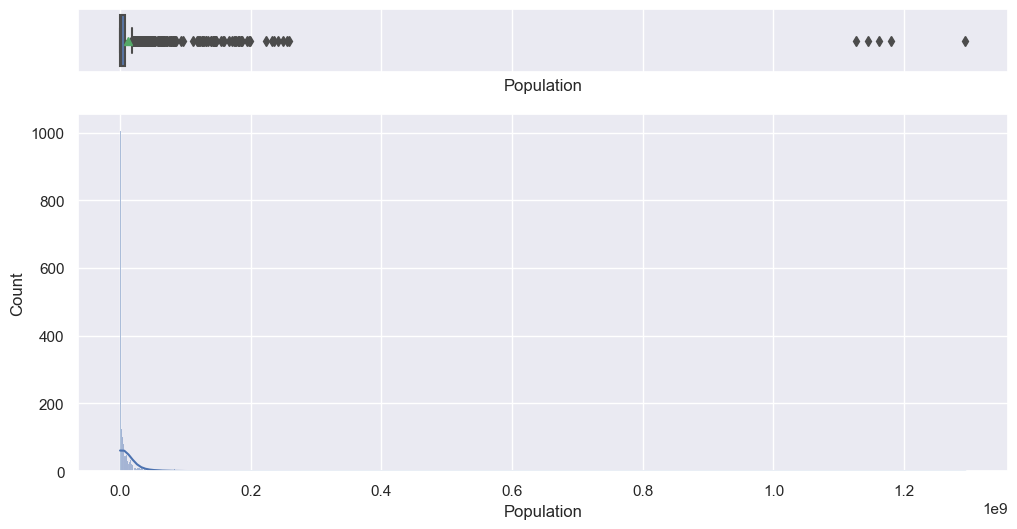

In [15]:
hist_box(df, 'Population')

- There are 5 outliers to the far right over a billion.
- These may include China and India.

In [16]:
df[(df.Population>1.0e9)]

Country  Year      Status    Population  Hepatitis B  Measles  Polio  \
1137   India  2014  Developing  1.293859e+09         79.0    79563   84.0   
1144   India  2007  Developing  1.179681e+09          6.0    41144   67.0   
1145   India  2006  Developing  1.161978e+09          6.0    64185   66.0   
1146   India  2005  Developing  1.144119e+09          8.0    36711   65.0   
1147   India  2004  Developing  1.126136e+09          6.0    55443   58.0   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
1137        85.0       0.2            957               1200   
1144        64.0       0.3           1400               1900   
1145        65.0       0.3           1500               2000   
1146        65.0       0.3           1500               2000   
1147        63.0       0.3           1600               2100   

      Total expenditure          GDP   BMI  thinness  1-19 years  Alcohol  \
1137               4.69  1573.118890  18.1                  26.8     3.07   
1144               4.23   118.166373  14.4                  27.1     1.59   
1145               4.25   792.259698  13.9                  27.1     1.37   
1146               4.28    77.819000  13.5                  27.2     1.27   
1147               4.22   621.318377  13.0                  27.2     1.20   

      Schooling  Life expectancy  
1137       11.6             68.0  
1144        9.9             65.2  
1145        9.7             64.8  
1146        9.4             64.4  
1147        9.2             64.0

- There are just five such observations which can be considered as outliers.

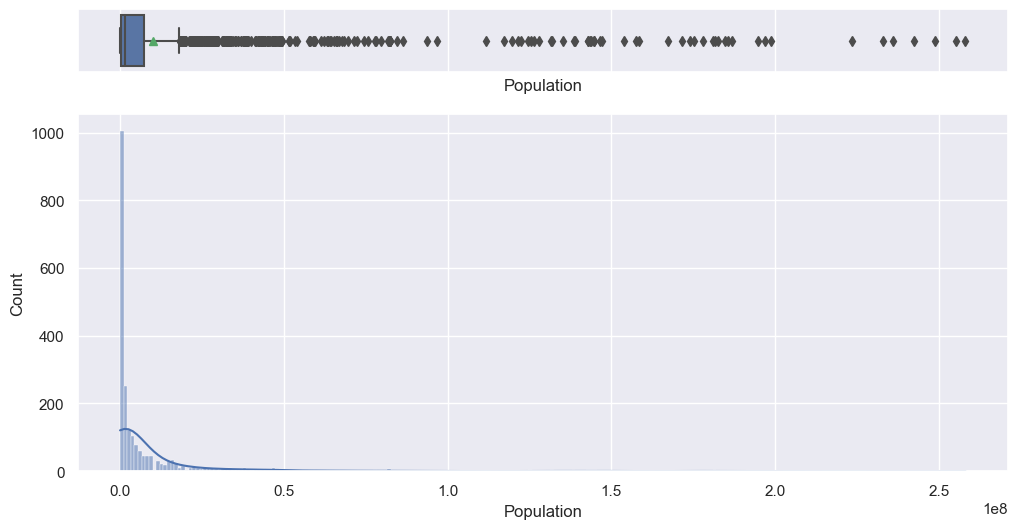

In [17]:
df1 = df[(df.Population<1.0e9)]
hist_box(df1, 'Population')

#### Now we check the ones over 100 million.

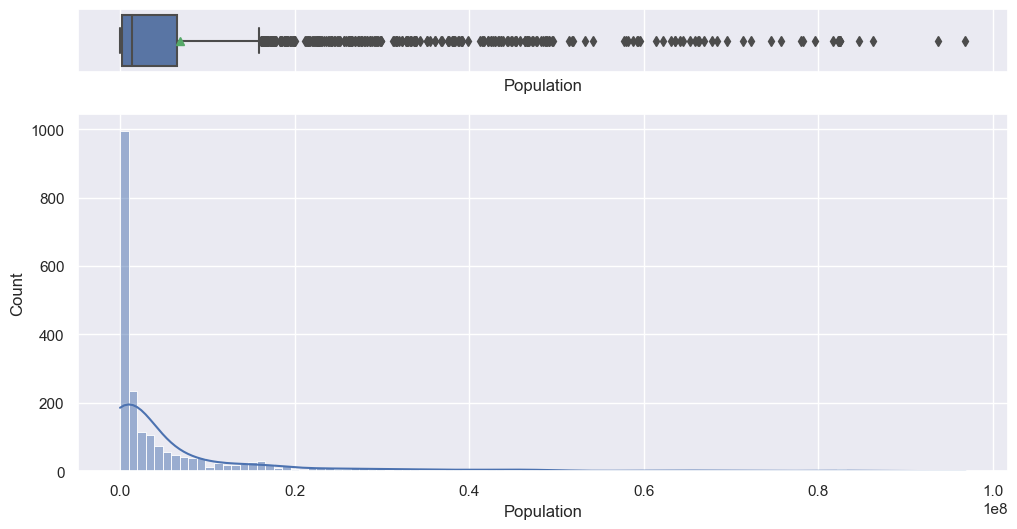

In [19]:
df1 = df[(df.Population<1.0e8)]
hist_box(df1, 'Population')

**Lets plot the histogram and box plot for the variable `Hepatitis B` using the hist_box function**


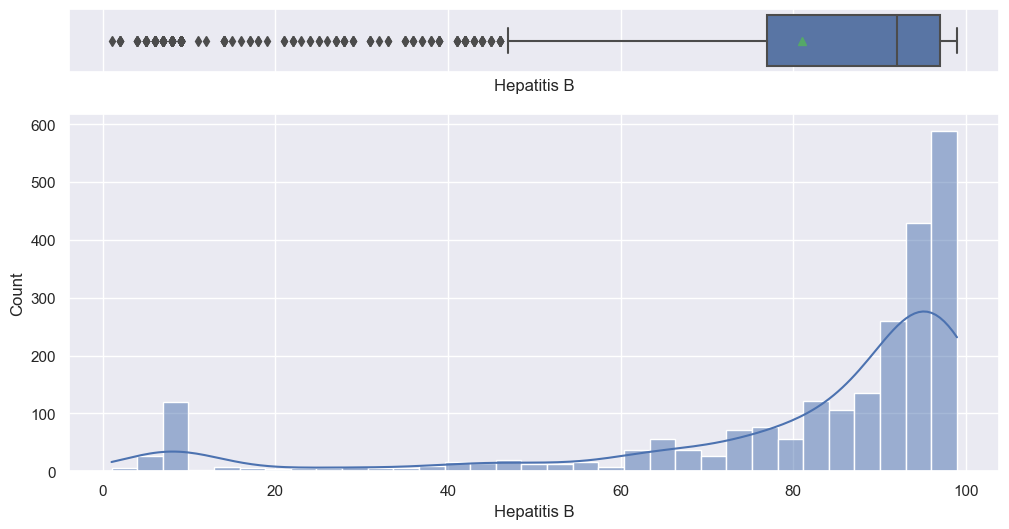

In [20]:
hist_box(df,'Hepatitis B')

- The distribution for the Hepatitis B is left-skewed. 
- Boxplot shows that the number of Hepatitis B has some outliers at the left end. Let's check how many such extreme values are there. 

In [22]:
# Value counts
df['Hepatitis B'].value_counts()

99.0    228
98.0    206
96.0    161
97.0    154
95.0    146
       ... 
15.0      1
12.0      1
32.0      1
11.0      1
19.0      1
Name: Hepatitis B, Length: 87, dtype: int64

In [23]:
# Value count percentage
df['Hepatitis B'].value_counts(normalize=True)

99.0    0.098873
98.0    0.089332
96.0    0.069818
97.0    0.066782
95.0    0.063313
          ...   
15.0    0.000434
12.0    0.000434
32.0    0.000434
11.0    0.000434
19.0    0.000434
Name: Hepatitis B, Length: 87, dtype: float64

#### Detecting outliers

In [26]:
df1 = df[(df['Hepatitis B']<16)]
df1

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
40       Algeria  2007  Developing     34376.0          9.0        0   95.0   
41       Algeria  2006  Developing  33777915.0          8.0      944   95.0   
87     Argentina  2008  Developing   4382389.0          9.0        0   94.0   
149   Azerbaijan  2010  Developing    954332.0          8.0        0   85.0   
155   Azerbaijan  2004  Developing      8365.0          5.0      827   78.0   
...          ...   ...         ...         ...          ...      ...    ...   
2815       Yemen  2000  Developing         NaN         14.0        0   74.0   
2816      Zambia  2015  Developing    161587.0          9.0        9    9.0   
2824      Zambia  2007  Developing  12725974.0          8.0      535   77.0   
2837    Zimbabwe  2010  Developing   1486317.0          9.0     9696   89.0   
2844    Zimbabwe  2003  Developing  12633897.0          7.0      998    7.0   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
40          95.0       0.1             20                 23   
41          95.0       0.1             20                 23   
87          93.0       0.1             10                 11   
149         81.0       0.1              5                  6   
155         77.0       0.1              6                  8   
...          ...       ...            ...                ...   
2815        74.0       0.1             48                 66   
2816         9.0       4.1             27                 40   
2824         8.0      13.6             32                 51   
2837        89.0      15.7             29                 44   
2844        68.0      36.7             26                 41   

      Total expenditure          GDP   BMI  thinness  1-19 years  Alcohol  \
40                 3.82  3935.183343   5.8                   6.0     0.44   
41                 3.36  3464.617900  49.8                   6.1     0.36   
87                 6.66  8953.359275  58.6                   1.0     8.41   
149                5.33  5842.857840  48.0                   2.8     1.98   
155                7.92   145.216300  44.2                   3.0     0.62   
...                 ...          ...   ...                   ...      ...   
2815               4.14          NaN  31.2                  14.1     0.07   
2816                NaN  1313.889646  23.4                   6.3      NaN   
2824               4.37   114.587985  19.2                   6.9     2.08   
2837               5.37   713.635620  29.4                   7.1     5.21   
2844               6.52   453.351155  26.7                   9.8     4.06   

      Schooling  Life expectancy  
40         12.3             73.8  
41         12.3             73.4  
87         16.3             75.4  
149        11.7             71.1  
155        11.0             68.4  
...         ...              ...  
2815        7.7             68.0  
2816       12.5             61.8  
2824       11.1             52.6  
2837       10.0             52.4  
2844        9.5             44.5  

[162 rows x 18 columns]

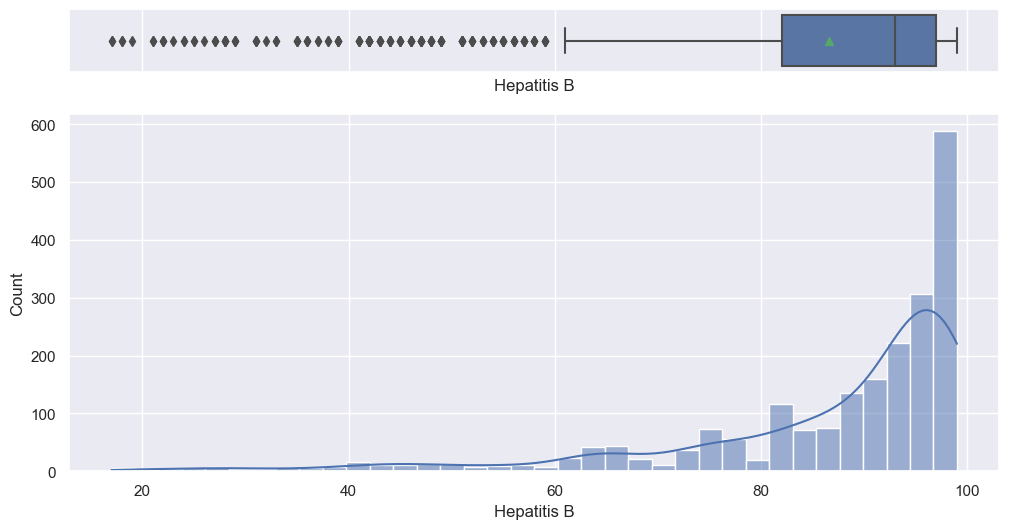

In [27]:
df1 = df[(df['Hepatitis B']>16)]
hist_box(df1,'Hepatitis B')

- After filtering with threshold 16, we see outliers with another threshold 60. 

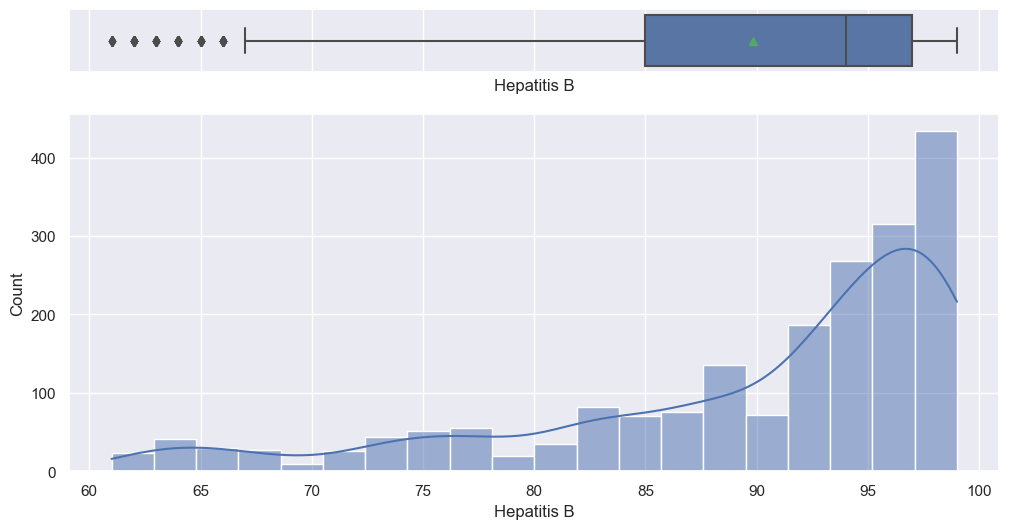

In [29]:
df1 = df[(df['Hepatitis B']>60)]
hist_box(df1,'Hepatitis B')

**Histogram of infant deaths.**

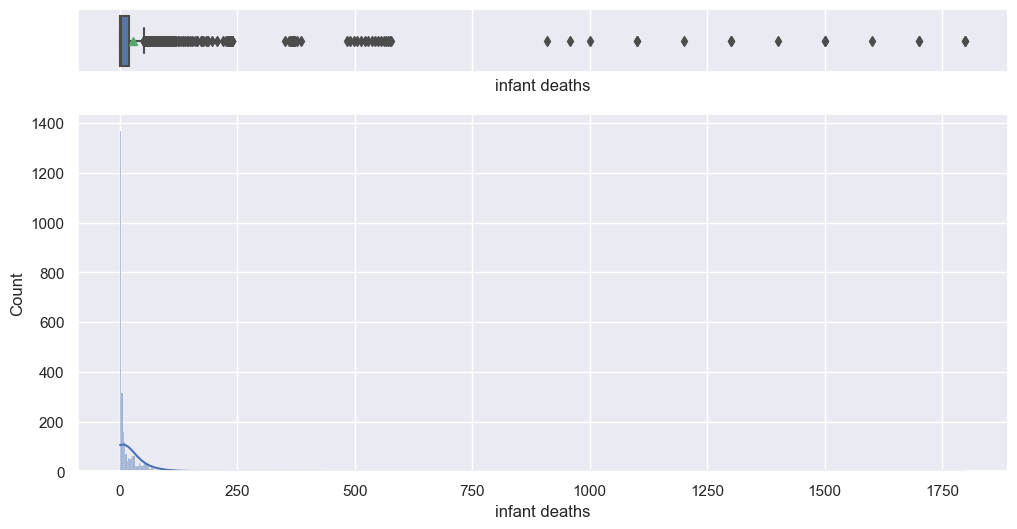

In [30]:
hist_box(df,'infant deaths')

- More than 850 Infant deaths are outliers. 

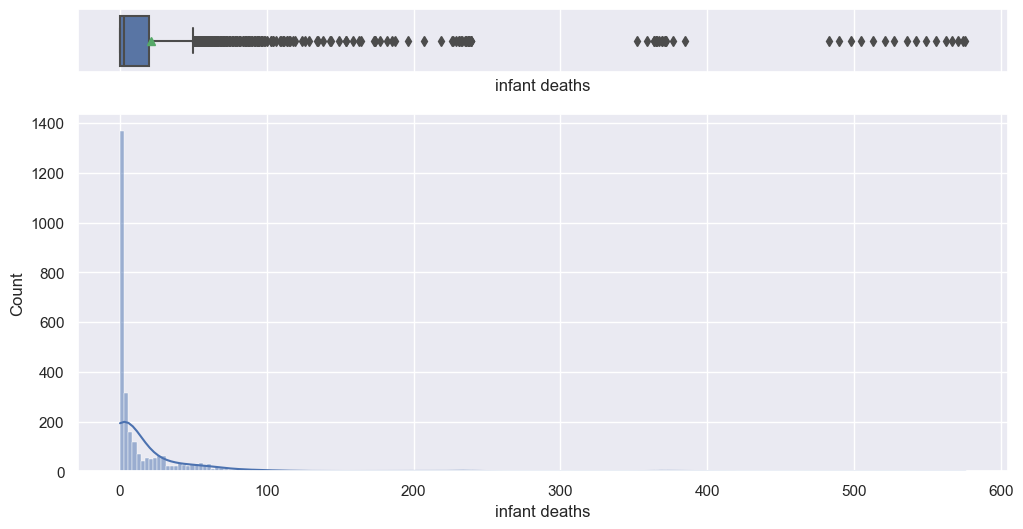

In [31]:
# Removing outliers with threshold 750
hist_box(df[df['infant deaths'] < 750],'infant deaths')

- Most of data samples have less than 100 infant deaths.

#### Total expenditure

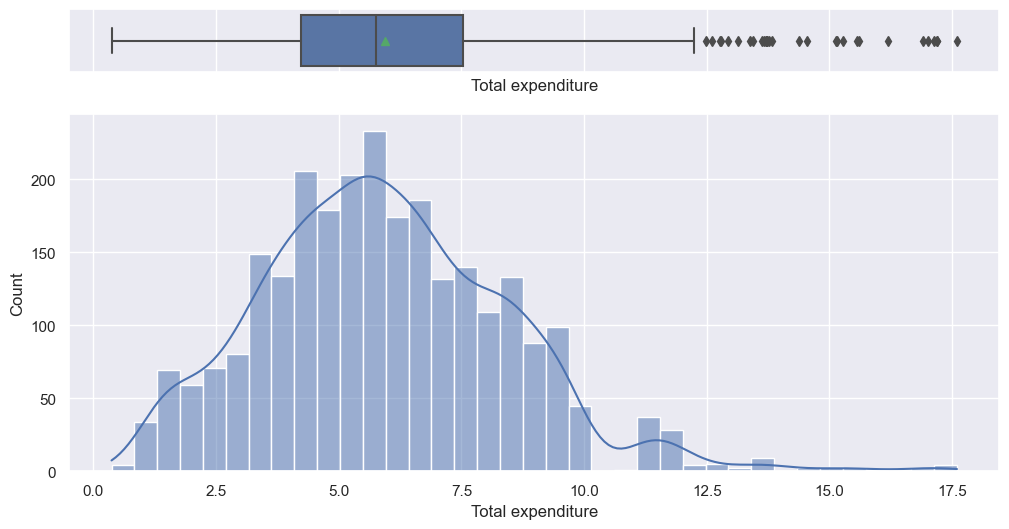

In [32]:
hist_box(df,'Total expenditure')

- Apart from some outliers, the distribution is close to normal.

**GDP**

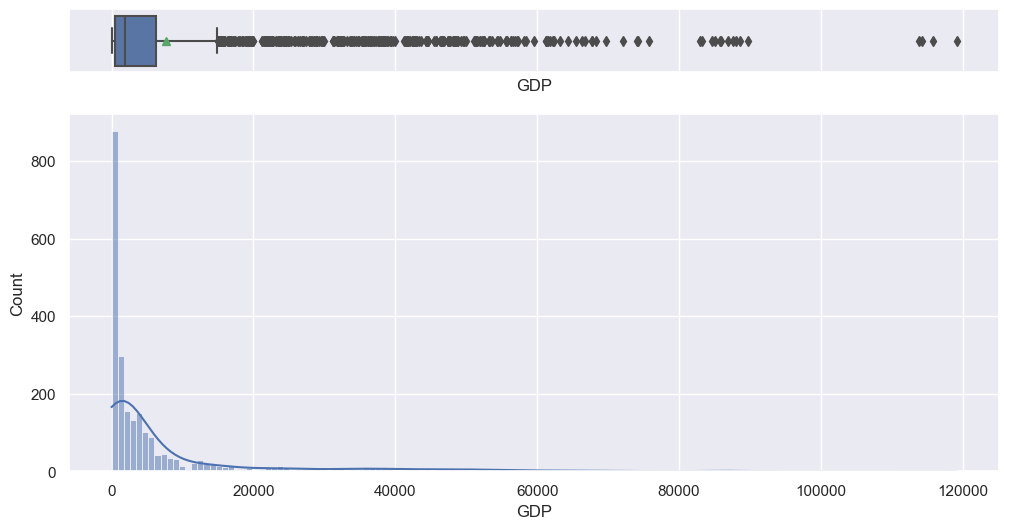

In [44]:
hist_box(df,'GDP')

- The dataset is right-skewed.
- Apart from some developed countries, most of countries have GDPs lower than 20000.

**BMI**

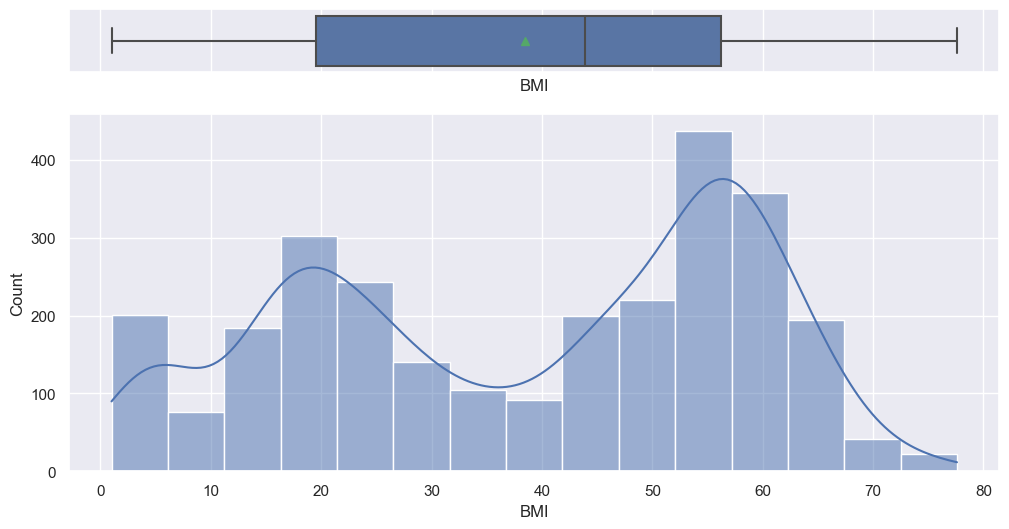

In [33]:
hist_box(df,'BMI')

- The dataset is bimodal.
- BMI is body mass index.

**Schooling**

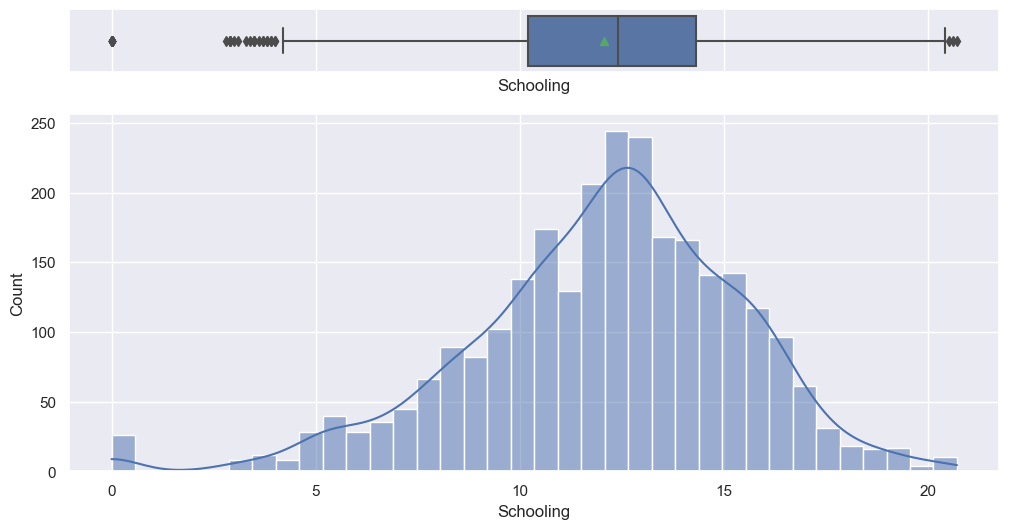

In [48]:
hist_box(df, 'Schooling')

- The distribution is close to normal.

**Life Expectancy**

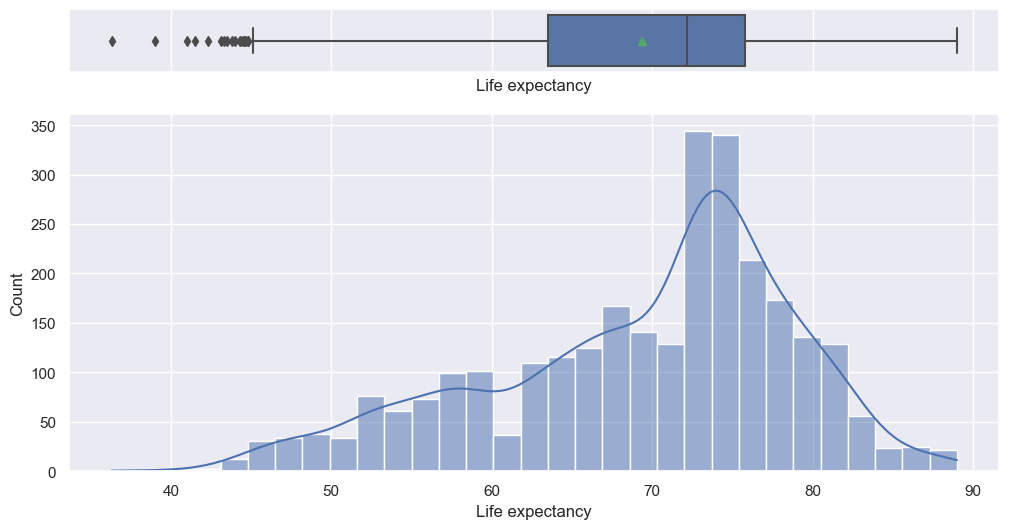

In [49]:
hist_box(df, 'Life expectancy')

- It is slightly left-skewed.
- Most of samples seem to have life expectancy in the 70s.

In [52]:
df['Life expectancy'].value_counts()

73.0    44
75.0    31
78.0    29
73.6    27
81.0    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: Life expectancy, Length: 362, dtype: int64

### **Bivariate Analysis**

#### **Pairplot for visualizing pairwise correlations**

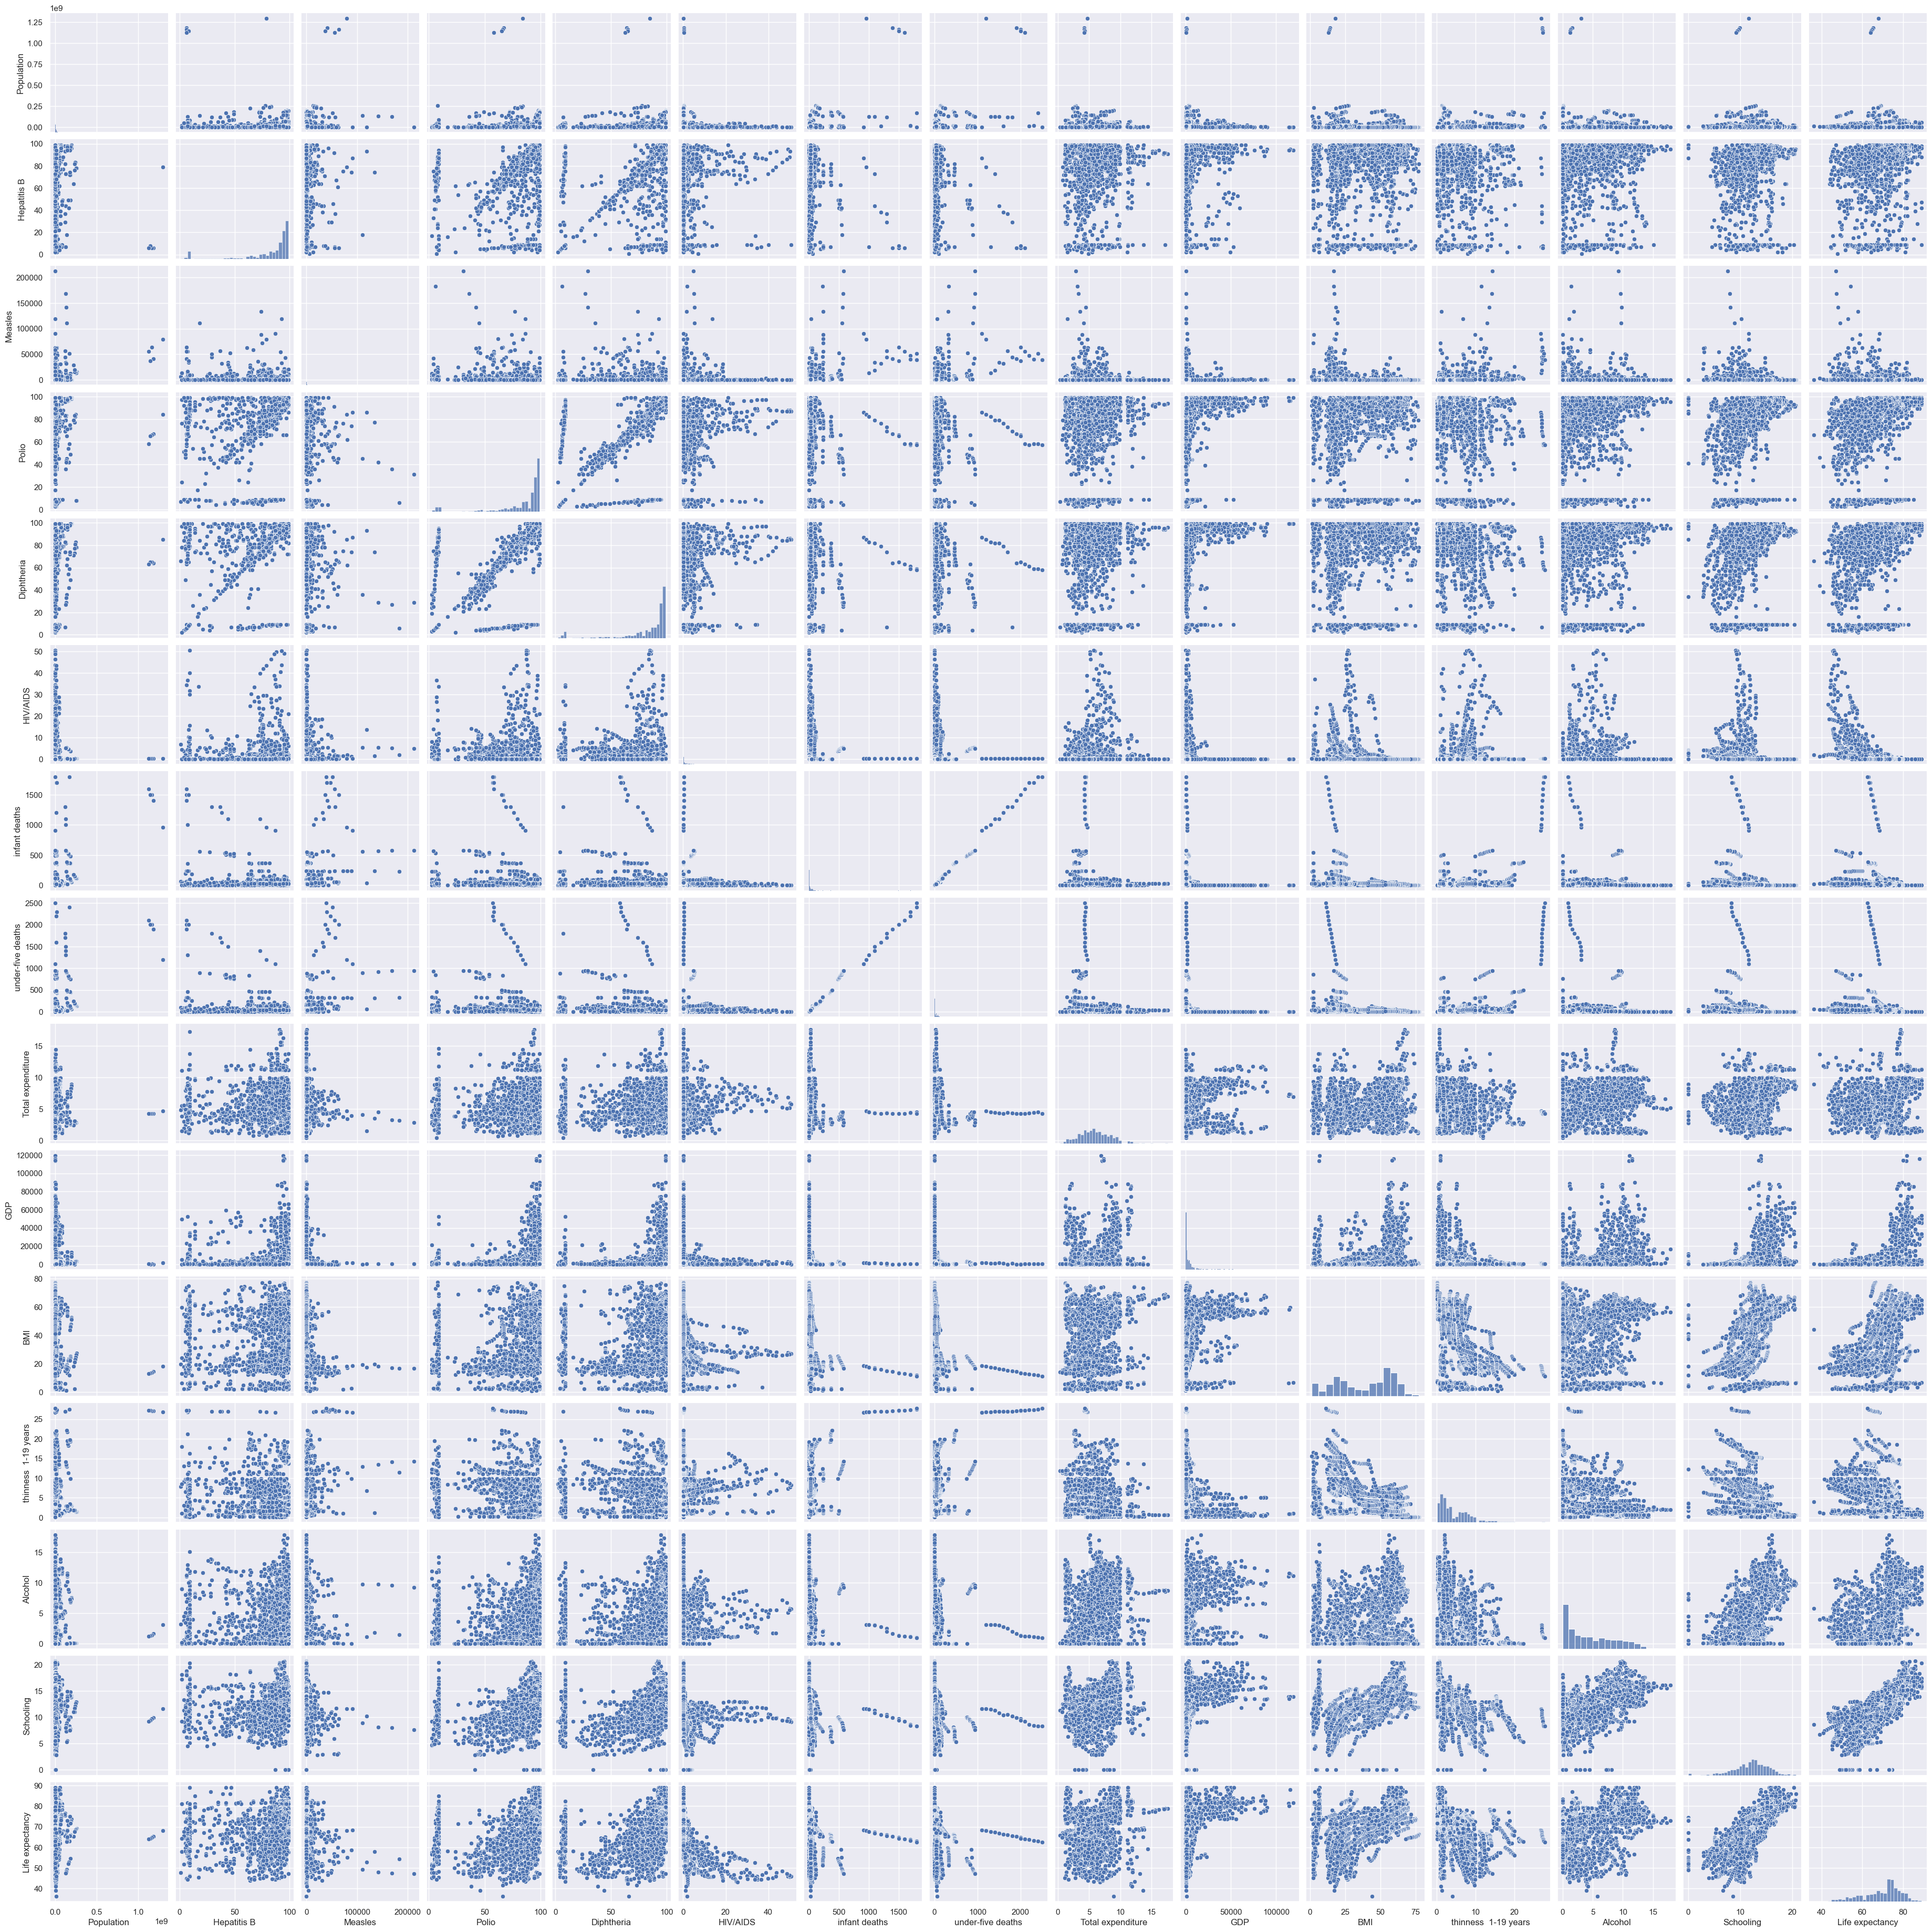

In [54]:
sns.pairplot(df)
plt.show()

- Infant deaths and under 5 deaths are highly correlated.
- Schooling and life expectancy are somewhat correlated.
- Other features do not seem to have correlations.

#### **Correlation matrix using a heatmap**



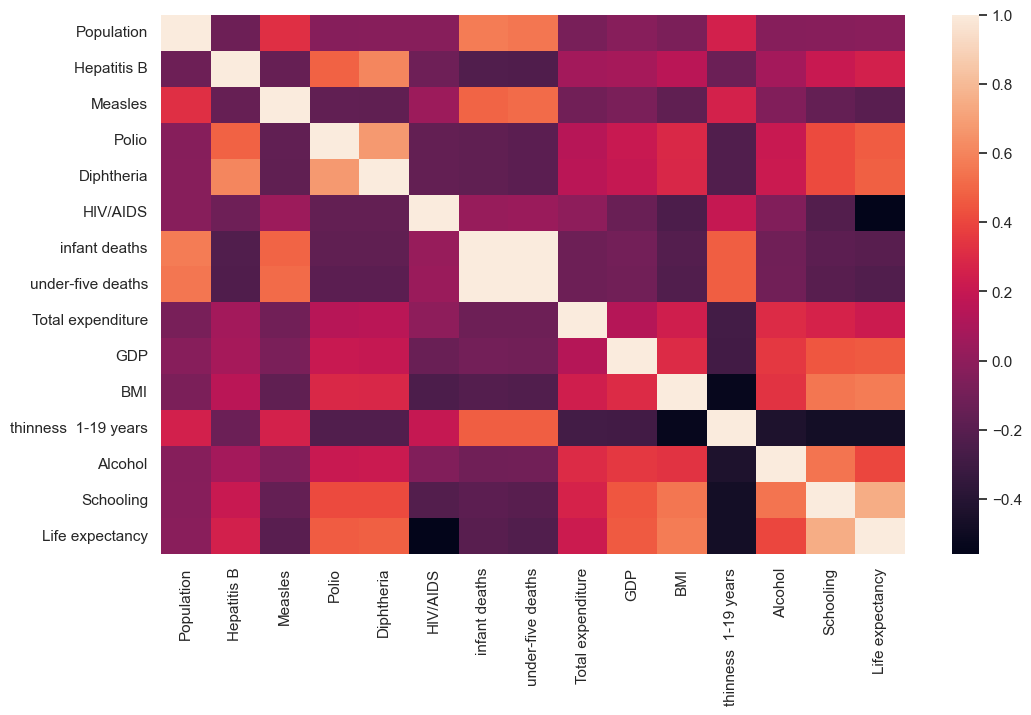

In [53]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr())
plt.show()

- Schooling and life expectancy are correlated.
- Schooling and BMI seem to be correlated.
- BMI and life expectancy are somewhat correlated.
- These may reflect the correlation between the income level and life expectancy.
- Thinness 1 - 19 years has low correlations with Total expenditure, GDP, BMI, Alcohol, Schooling, and Life expectancy.


### **Building the model**

We will be building 4 different models:

- **Linear Regression**
- **Decision Tree**
- **Random Forest**

## **Data Preparation for Modeling**


**Separating the independent variables (X) and the dependent variable (Y)**


**Y is a continuous variable.**

In [48]:
# Separating target variable and other variables
X=data.drop(columns='Life expectancy')
Y=data['Life expectancy']

**Splitting the data into a 70% train and 30% test set**

In [49]:
# Splitting the data into train and test sets
rng = np.random.default_rng(12345)
sample_weight = rng.random(len(X))
X_train,X_test,y_train,y_test, sw_train, sw_test=train_test_split(X,Y,sample_weight, test_size=0.30, random_state=5)

**As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**

**The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, or most frequent) of each column in which the missing values are located.**

In [50]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths', 'thinness  1-19 years','Total expenditure', 'GDP', 'BMI', 'Alcohol', 'Schooling']

# Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [51]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['Country','Year','Status']

# Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

# Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [52]:
def convert_categorical(X, col1, col2):
    dummies = pd.get_dummies(X[col1])
    merged = pd.concat([X, dummies], axis='columns')
    
    dummies = pd.get_dummies(merged[col2])
    merged = pd.concat([merged, dummies], axis='columns')

    merged = merged.drop([col1, col2], axis=1)
    return merged

X_train = convert_categorical(X_train, 'Country', 'Status')
X_test = convert_categorical(X_test, 'Country', 'Status')

In [53]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Year           0
Population     0
Hepatitis B    0
Measles        0
Polio          0
              ..
Yemen          0
Zambia         0
Zimbabwe       0
Developed      0
Developing     0
Length: 195, dtype: int64
------------------------------
Year           0
Population     0
Hepatitis B    0
Measles        0
Polio          0
              ..
Yemen          0
Zambia         0
Zimbabwe       0
Developed      0
Developing     0
Length: 195, dtype: int64


**Let's create dummy variables for string type variables and convert other column types back to float.**

In [54]:
#converting data types of columns to float
for column in ['Year', 'Measles', 'infant deaths', 'under-five deaths']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [56]:
# Creating metric function 
def metrics_score(actual, predicted):
    print("MSE: ", MSE(actual, predicted))
    print("RMSE: ", math.sqrt(MSE(actual, predicted)))
    print("MAE: ", MAE(actual, predicted))
    print("R2 Score: ", r2(actual, predicted))
    
def plot(actual, predicted): 
    errors = []
    actual = pd.Series.to_numpy(actual)
    
    for i in range(len(actual)):
        # calculate error
        err = (actual[i] - predicted[i])**2
    
        # store error
        errors.append(err)
    
    # report error
    print('>%.1f, %.1f = %.3f' % (actual[i], predicted[i], err))
    plt.plot(errors)
    plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
    plt.xlabel('Predicted Value')
    plt.ylabel('Mean Squared Error')
    plt.show()

### **Linear Regression**

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### **Check the performance of the model on train and test data**

In [58]:
# Checking the performance on the training data
y_pred_train = lr.predict(X_train)
metrics_score(y_train, y_pred_train)

MSE:  3.410083911663095
RMSE:  1.8466412514787747
MAE:  1.1373348005665742
R2 Score:  0.9627994087748586


>73.3, 72.9 = 0.168


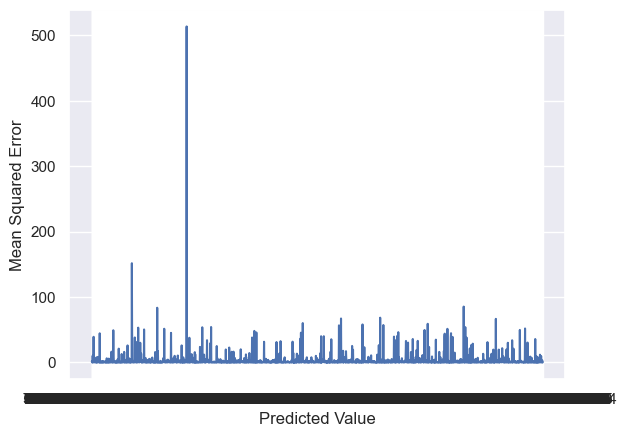

In [59]:
plot(y_train, y_pred_train)

#### Let's check the performance on the test set

MSE:  3.3003151033972764
RMSE:  1.816676939743904
MAE:  1.1785416112121385
R2 Score:  0.96275670972452
>53.6, 56.4 = 7.673


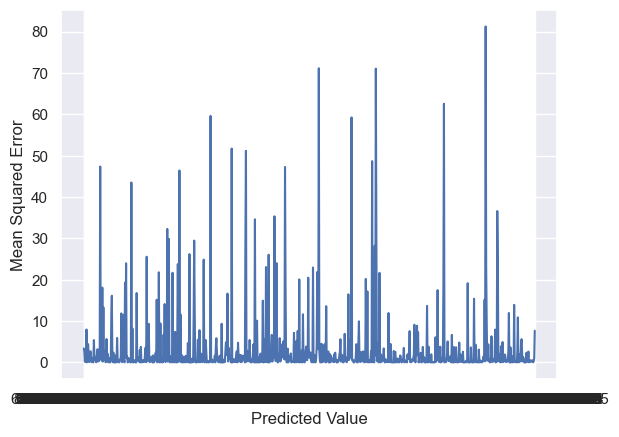

In [60]:
# Checking the performance on the test dataset

y_pred_test = lr.predict(X_test)
metrics_score(y_test, y_pred_test)
plot(y_test, y_pred_test)

- The performance metrics are very similar with R2 Scores being 0.96.

#### Let's try scaling

In [61]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

MSE:  276601.5733317032
RMSE:  525.9292474579668
MAE:  525.8731157447573
R2 Score:  -3016.445414334506
>73.3, -446.8 = 270539.870


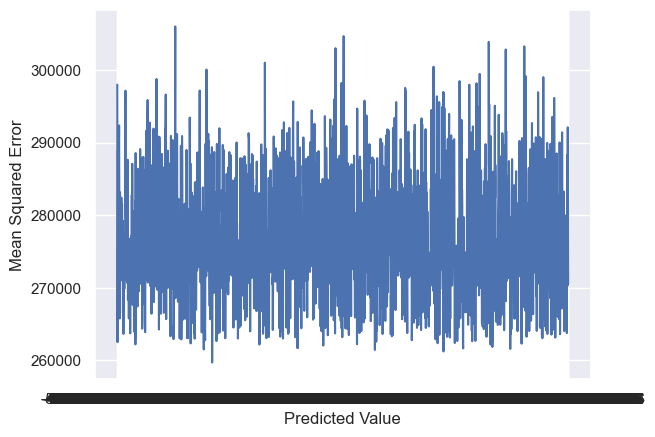

In [64]:
# Checking the performance on the test dataset

y_pred_train = lr.predict(X_train_scaled)
metrics_score(y_train, y_pred_train)
plot(y_train, y_pred_train)

- We observe that for this dataset, non-scaled dataset performs better.

### **Decision Trees**

In [65]:
model_dt = DecisionTreeRegressor(random_state=0)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
y_pred_train_dt = model_dt.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_dt)

MSE:  7.599663512415166e-32
RMSE:  2.7567487213047123e-16
MAE:  1.0695575550829406e-17
R2 Score:  1.0


- R2 score is 1 meaning the model error is 0. This may indicate overfitting. Let's test on the test dataset.

In [69]:
y_pred_test_dt = model_dt.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_dt)

MSE:  7.71901754385965
RMSE:  2.778311995413699
MAE:  1.6290058479532166
R2 Score:  0.9128926778138367


- R2 score is 0.9129 which is not low. Now let us try on non-scaled dataset.

In [83]:
model_dt = DecisionTreeRegressor(random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
y_pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

MSE:  7.599663512415166e-32
RMSE:  2.7567487213047123e-16
MAE:  1.0695575550829406e-17
R2 Score:  1.0


In [85]:
y_pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

MSE:  7.470140350877193
RMSE:  2.7331557494729775
MAE:  1.612748538011696
R2 Score:  0.9157011991976436


- Scaled and non-scaled data result in similar performance.

In [86]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

[Text(0.5902168056593958, 0.9848484848484849, 'X[6] <= 0.65\nsquared_error = 91.667\nsamples = 1993\nvalue = 69.296'),
 Text(0.31752331298173747, 0.9545454545454546, 'X[14] <= 11.45\nsquared_error = 34.955\nsamples = 1473\nvalue = 73.569'),
 Text(0.09224754960346936, 0.9242424242424242, 'X[11] <= 44.05\nsquared_error = 23.118\nsamples = 322\nvalue = 66.88'),
 Text(0.05154459073092366, 0.8939393939393939, 'X[5] <= 68.5\nsquared_error = 18.304\nsamples = 227\nvalue = 65.219'),
 Text(0.011451321273651775, 0.8636363636363636, 'X[7] <= 0.5\nsquared_error = 12.857\nsamples = 53\nvalue = 62.006'),
 Text(0.003802959177610078, 0.8333333333333334, 'X[157] <= 0.5\nsquared_error = 2.276\nsamples = 5\nvalue = 68.9'),
 Text(0.002716399412578627, 0.803030303030303, 'X[11] <= 23.85\nsquared_error = 1.082\nsamples = 3\nvalue = 69.933'),
 Text(0.002173119530062902, 0.7727272727272727, 'squared_error = 0.0\nsamples = 1\nvalue = 71.4'),
 Text(0.0032596792950943523, 0.7727272727272727, 'X[9] <= 3.445\nsqua

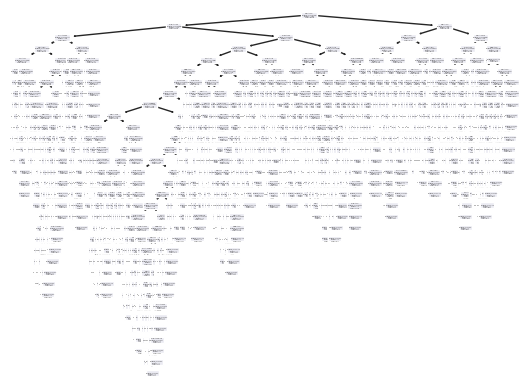

In [87]:
# The architecture of the model
tree.plot_tree(model_dt)

 #### **Perform hyperparameter tuning for the decision tree model using GridSearch**

In [79]:
# Choose the type of classifier.
estimator = DecisionTreeRegressor(random_state=1)
# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='r2',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                      random_state=1)

- The best performing tree architecture for the dataset is with 6 layers, 50 leaf notes and sample split of 10.

#### **Check the performance of the model on the train and test data using the tuned model**

#### Checking performance on the training set 

In [80]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

MSE:  8.39236578482992
RMSE:  2.8969580226213014
MAE:  2.2127974672599984
R2 Score:  0.9084477165193683


In [81]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

MSE:  10.212693655955484
RMSE:  3.1957305355670216
MAE:  2.38464432111478
R2 Score:  0.8847521214165962


* It performed worse than the original model. Let us see the parameters of the original decision tree.

#### **Visualizing the Decision Tree**

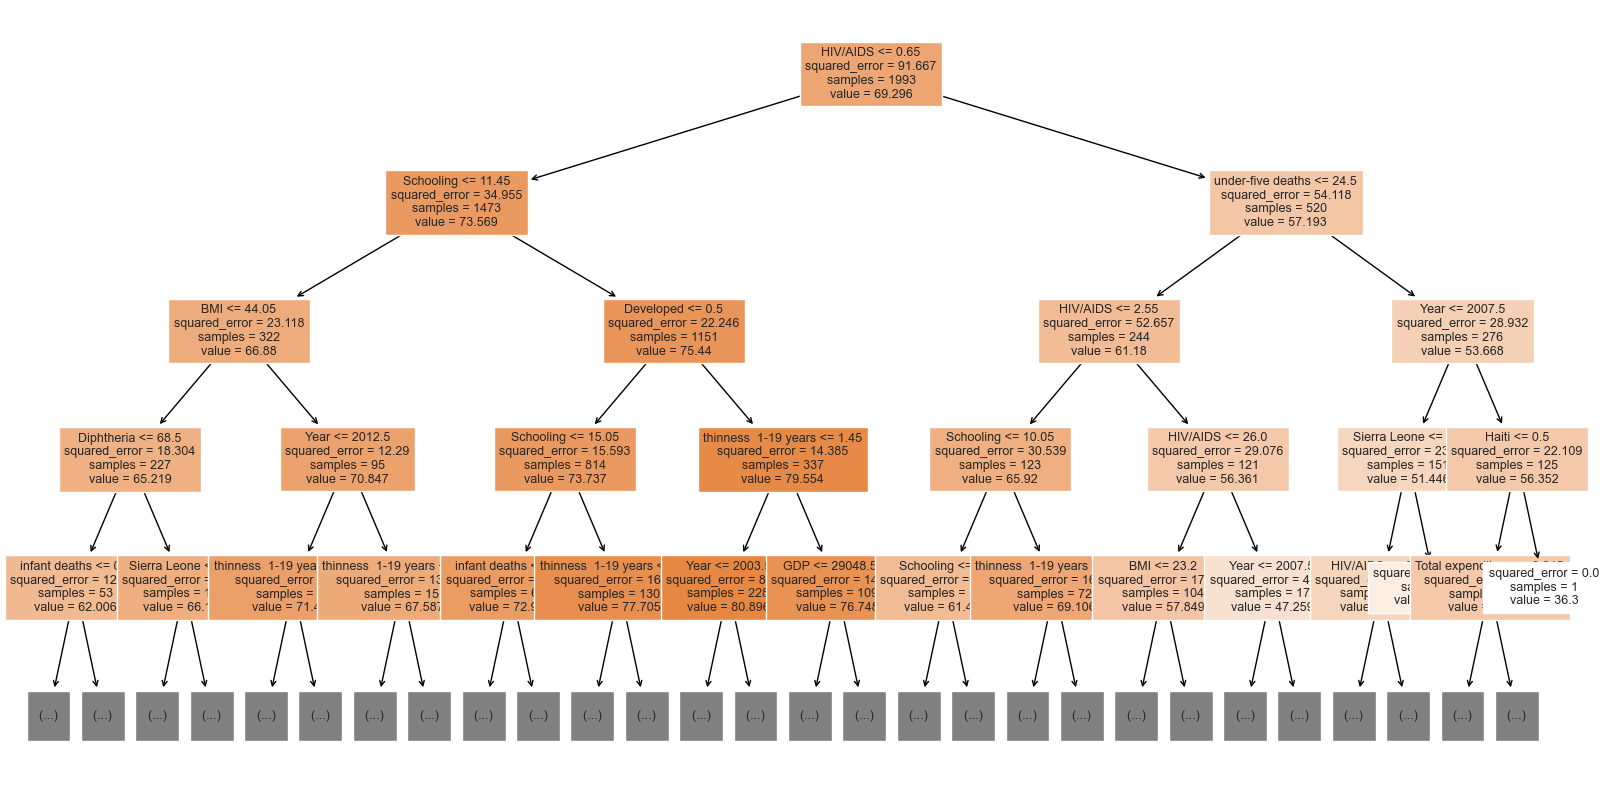

In [88]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### **Random Forest**

#### **Build a Random Forest Model**

In [91]:
rf_estimator = RandomForestRegressor(random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### **Check the performance of the model on the train and test data**

In [94]:
# training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

MSE:  0.6054835674862027
RMSE:  0.778128246169102
MAE:  0.5067606623181125
R2 Score:  0.9933947822777741


In [95]:
# test data
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

MSE:  3.3784193836257295
RMSE:  1.8380477098339232
MAE:  1.2217742690058477
R2 Score:  0.9618753210421753
